# K-Means Clustering
Unsupervised - > Utilizzato spesso per grandi dataset

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')


In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X = df.iloc[:,[3, 4]].values  # X = colonne Annual Income (k$) e	Spending Score (1-100)

Siccome vogliamo fare un plot per vedere un grafico, usiamo solo le ultime 2 features (non stiamo eliminando le altre features perche non sono importanti, (tranne CustomerID, questa non e' importante di solito))
Cosi mostriamo come un **diverso annual income** porta il modello a formare i cluster in base alle compere fatte da queste categorie di persone.
cioe' il modello mostra se c e relazione tra il guadagno di una persona e quanto questa ha speso in un centro commerciale. Questo e utile perche in base ha questi dati, sappiamo se delle persone con annual_income simili sono dei potenziali clienti ho no. Quindi in base a questi dati sappiamo a quale categoria di persone conviene mandare publicita' di nuovi prodotti, e a chi non conviene.

Il metodo **K-MEANS**(**unsupervise learning)** non usa la variabile y per la classificazione, ma trova un accumunamento tra i datapoint che sono piu' simili tra loro. Questo grazie a processi come i **centroidi**, e **l aggiustamento del Klusters** durante il training del modello

## FEATURES SCALING
E importante scalare i dati con il metodo K-means, sopratutto quando le scale sono diverse, perche  K-means usa la **distanza euclidea** per regolare **dove piazzare i centroidi**. Se una feature ha valori molto più grandi di un'altra, dominerà il calcolo delle distanze, portando a cluster distorti.

### IMPORTANTE
Se il dataset ha una distribuzione non normale, (dati sparsi e non **gaussiani**), oppure ha **forti outliers**, e' consigliato usare **RobustScaler**. Questa tecnica scala i dati centrali, quelli superiori > tra Q1 e Q3. la mediana(i valori piu' presenti) sta in mezzo di Q1 e Q3, e siccome i dati che calcolano la mediana e i quartili si fanno partendo dai valori piu' grandi a quelli piu piccoli [-20,1,2,2,3,4,5,5,5,6,7,888], con questi calcoli scaleremo i dati in base al **IQR** e hai dati centrali non facendo influenzare la scalatura dei dati tra Q1 e Q3 che nell esempio sopra sono piu o meno [1,2,2,3,4,5,5,5,6,7]. la scalatura di questi dati non si comprimeranno intorno allo **0** a causa della maggiore "media" dovuta alla alta varianza e agli outliers o dovuta alla distribuzione **sparsa**, ma ne risentira solo la scalatura di quell outlier e non dei dati centralizzati. 
infatti se usiamo lo **Standardscaler** in presenza di outliers o di una distribuzione non normale, **la deviazione standard aumenta e i valori delle variabili vengono compresse verso lo zero.**  Con **RobustScaler** invece, la scalatura dei datapoints dei dati **centrati** sara' coerente, perche gli outliers non incideranno sui dati incentrati entro i **quartili Q1 e Q3**:

Dati scalati con **StandardScaler** su dati con outlier = [1, 2, 3, 4, 5, 6, 100]<br>
[-0.46, -0.43, -0.41, -0.38, -0.36, -0.33, 2.38]<br><br>

Dati scalati con **StandardScaler** su dati senza outlier = [1, 2, 3, 4, 5, 6, 8]<br>
[-1.48, -1.01, -0.54, -0.07, 0.40, 0.87, 1.82]<br><br>

Dati scalati con **RobustScaler** su dati con outlier (stessi dati di sopra)
[-0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 24.0]<br><br>

Dati scalati con **RobustScaler** su dati senza outlier (stessi dati di sopra)<br>
[-0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 1.0]

Con il metodo **RobustScaler**la scalatura dei primi 6 dati non e' cambiata, ma e cambiata con il metodo **StandardScaler**.

Quindi RobustScaler **non scala i dati calcolando la media dei dati**, ma li scala  con un operazioni di calcolo sui quartili e mediani(i dati tra Q1 e Q3). Il punto di forza e proprio questo, la scalatura non dipende piu' dalla media(influenzabile da outliers e dati sparsi), e questo e molto utile perche i dati scalati  saranno **'squilibrati'** solo per gli stessi outliers, (i dati prima di Q1 e dopo Q3), e non per tutti i dati a prescindere(cioe' quelli piu' incentrati intorno alla media), come succede con **Standard Scaler**<br>

Il calcolo di RobustScaler per scalare i dati:<br>
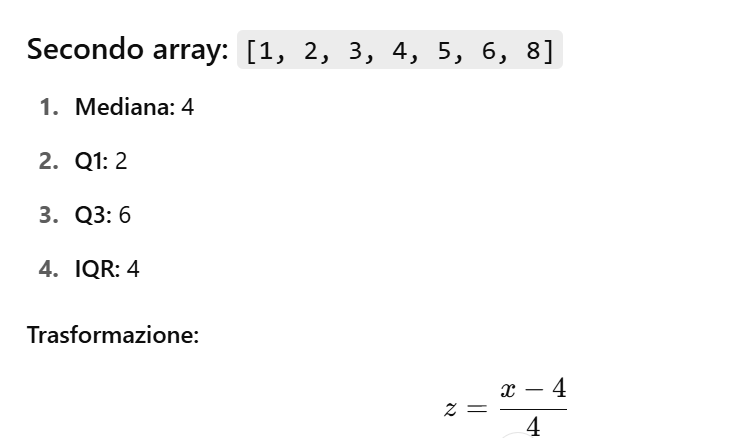<br>
risultato dei dati scalati = [-0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 1.0]


In [ ]:
# importante scalare i dati perche k-means usa i le distanze euclidee per creare correttamente i cluster tramite i centroidi
from sklearn.preprocessing import RobustScaler 

In [6]:
scaler = RobustScaler()

In [ ]:
X = scaler.fit_transform(X) # scaliamo i dati del dataset, (solo le colonne dtype = int/float )
# le colonne sono : Annual Income (k$) e Spending Score (1-100)

In [ ]:
X[:5] # dati scalati di Annual Income (k$) e Spending Score (1-100)

array([[-1.2739726 , -0.2875817 ],
       [-1.2739726 ,  0.81045752],
       [-1.24657534, -1.1503268 ],
       [-1.24657534,  0.70588235],
       [-1.21917808, -0.26143791]])

### Vediamo se ci sono troppe outliers prima di allenare il modello
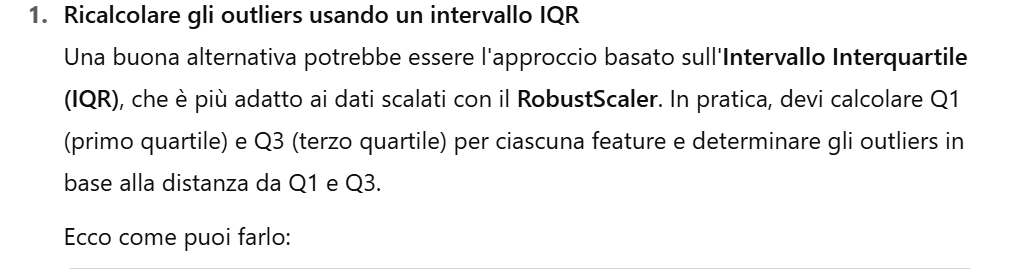

In [ ]:
import numpy as np

# Calcola i quartili Q1 e Q3
Q1 = np.percentile(X, 25, axis=0)
Q3 = np.percentile(X, 75, axis=0)

# Calcola l'IQR
IQR = Q3 - Q1

# Definisci i limiti inferiori e superiori per l'outlier
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Trova gli outliers
outlier_mask = (X < lower_limit) | (X > upper_limit)

# Calcola la percentuale di outliers
percent_outliers = np.mean(outlier_mask) * 100
print(f"Percentuale di valori considerati outlier: {percent_outliers:.2f}%")

##  (0.50%) outliers relativamente bassi e nella maggiorparte dei casi accettabili. Ricorda che i migliori modelli in presenza di outliers o molti 
# valori estremi entro le colonne sono randomforest e gradientboostin (ma quelli fanno parte del Supervise learning. just a reminder)

Percentuale di valori considerati outlier: 0.50%


In [11]:
# X[:,0] ##  annual_income

In [12]:
# X[:,1] ## spending score

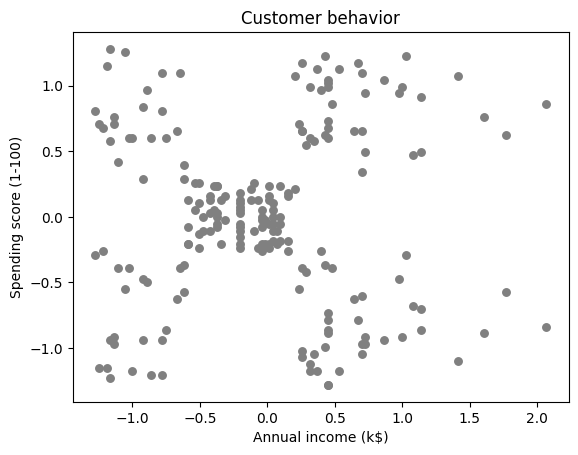

In [13]:
## Jusp plot the scatt of data before training the model
plt.scatter(X[:,0],X[:,1], s=29, c='grey')
plt.title('Customer behavior')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending score (1-100)')
plt.show()
# ase X = års_inkomst
# asse y = hur mkt man har spenderat på mallen (mall of skandinavia for ex)


## Using the elbow method to find the optimal number of clusters
**Elbow method** e' un metodo che ci consente di **definire il numero ideale di kluster**. Avendo il numero ideale di kluster, non avremo bisogno di averne di piu', perche questi ultimi non andranno a migliorare il modello, saranno inutili.

Il modello calcola il numero ottimali di kluster con la funzione WSCC (Guarda la chat salvata nel file per saperne di piu')

In [14]:
from sklearn.cluster import KMeans
# con il codice sotto usiamo la funzione "a gomito" che calcola la minore distanza tra il centroide del clusters e i datapoint. quindi il valore
# piu basso WCSS ci indichera il numero ottimale di kluster. (Se aggiungiamo un altro cluster a di fuori del numero suggerito, non avremo ulteriori benefici)

In [ ]:
# Calcoliamo il wcss
WCSS = []

for i in range(1,10): # misuriamo il numero ottimale di cluster da 1 a 9
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0) # init='k-means++' e' una funzione che posiziona il centroide in un punto adeguato ai 
    # datapoint, e non lo posiziona a caso. (cosi il kluster m)
    kmeans.fit(X) # passiamo le tutte le variabile per fare il calcolo del gomito (anche la var indipendente, perche non c e piu' bisogno di separare var ind e var dip) 
    WCSS.append(kmeans.inertia_)

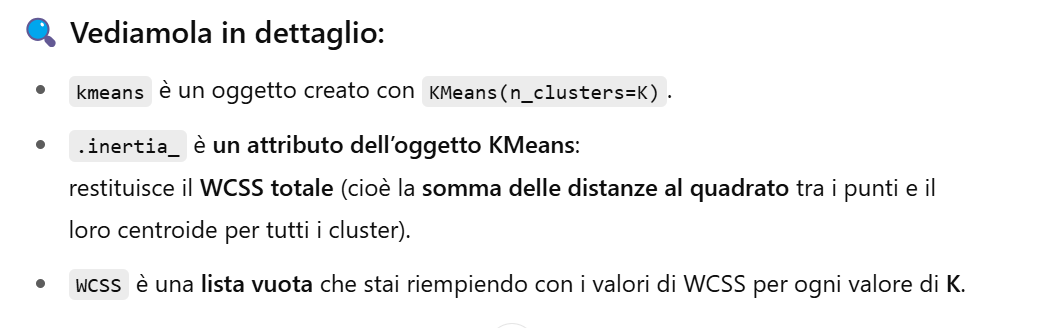

In [ ]:
WCSS
#👇 Questi numeri che hai riportato sono i valori totali di WCSS calcolati per diversi numeri di cluster (K) usando il metodo del gomito.
# Piu' Klusters(K), piu basso il WCSS totale
# 1 kluster, WCSS totale = 269981.28(il piu' alto)
# 9 kluster, WCSS totale = 22209.851608025543(il piu' basso)

# Il "gomito" nel grafico ti dirà qual è il K giusto da scegliere, Ma anche gia da questo array vediamo che i primi 2 cluster ridicono fortemente
# il valore che equivale alla somma delle distanze al quadrato tra i punti del cluster e il centroide al suo interno ([193.74457341617614,
#  130.67458715986035,). vediamo anche che gia dopo l agiunta di un terzo cluster ( 76.13090660902608) il valore non va troppo a diminuire, e infine 
# dopo il quinto cluster (32.27911691011694) i valore wcss scende di molto poco, il che vuol dire che il non c'e' bisogno di aggiungere piu'di 
# 3/5 cluster perche' il modello separa gia bene i clusters, e aggiungendo altri oltre questo numero non avremo grandi migliorie da parte del modello.

[193.74457341617614,
 130.67458715986035,
 76.13090660902608,
 53.328729606574825,
 32.27911691011694,
 26.998373872386523,
 25.856957667071605,
 19.832564291443443,
 16.304681552172532]

Anche se non puoi visualizzare il grafico perche' ci sono più di 3 feature, puoi trovare il numero ottimale di cluster con il metodo **✅ Indice di silhouette (molto consigliato)** (testalo in futuro)



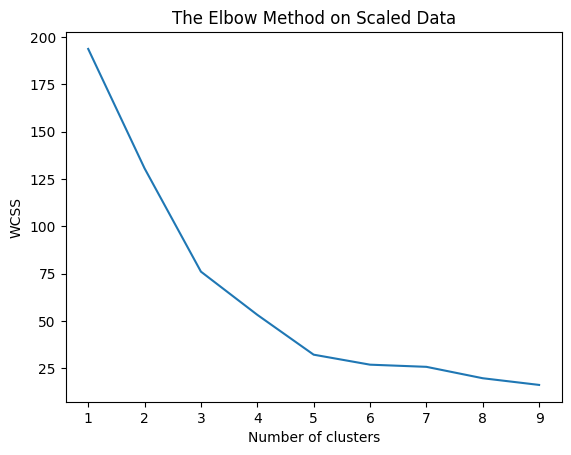

In [17]:
plt.plot(range(1,10),WCSS)
plt.title('The Elbow Method on Scaled Data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Notiamo che l asse WCSS che indica il valore totale WCSS di ciascun kluster, diminuisce rapidamente(migliora), ad ogni aggiunta di un cluster. Questo miglioramento avviene fino al cluster nr 5, dopodiche il WCSS non migliora. Questo vuol dire che **5 e' il nr ideale di clusters**, e se inseriamo 6 kluster, non avremmo un miglioramento rilevante, anzi **rischieremo solo overfitting**

## Training the K-Means model on the dataset

In [18]:
## alleniamo il modello con i nr di klusters indicato da WCSS
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

In [19]:
y_kmeans = kmeans.fit_predict(X) # il modello fa 5 kluster diversi, assegnando a ogni datapoint [a,b] di X una classe tra 0 e 4 

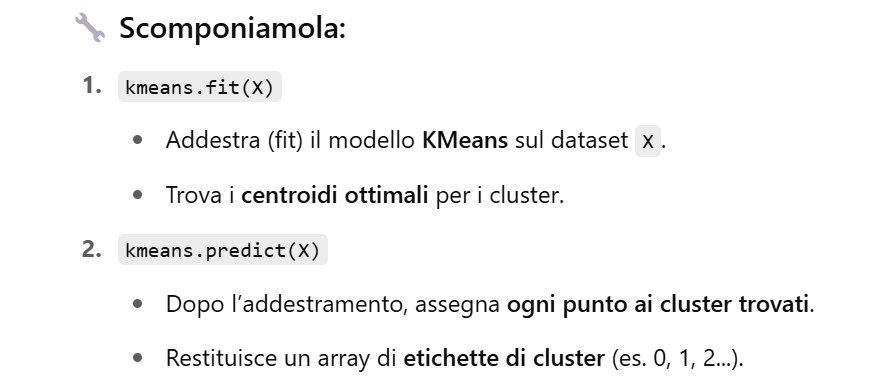<br>
durante L'allenamento con **kmeans.fit_predict(X)**, si verificano i **calcoli dei centroidi** che abbiamo descritto sopra.

Il dataset non ha variabili indipendeti, ma lo stesso, in base hai dati con la quale il modello e' stato allenato, questo riesce ad accomunare i datapoints, ed assegna ad essi le classi (da 0 a 4, uguali al range dei kluster)

In [ ]:
y_kmeans # questi sono i cluster che il modello ha assegnato a ogni rows di dati del nostro df
# ogni datapoint di X corrisponde a una classe che il modello ha assegnato
# al primo datapoint [ 15(scalato),  39(scalato)], il modello ha classe 4,
# al secondo datapont  [ 15(scalato),  81(scalato)], il modello ha assegnato classe 2
# e cosi via

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [21]:
X[:3]

array([[-1.2739726 , -0.2875817 ],
       [-1.2739726 ,  0.81045752],
       [-1.24657534, -1.1503268 ]])

In [ ]:
X[y_kmeans == 0][:3] # vediamo i dati X scalati (dati continui), alla quale il modello ha assegnato il cluster == 0

array([[-0.61643836,  0.2875817 ],
       [-0.5890411 ,  0.13071895],
       [-0.5890411 , -0.07843137]])

## Visualising the clusters

X[y_kmeans == 0,0] # questo codice visualizza i valori reali X,y di ogni cluster

l output saranno i valori di X corrispondenti alla classe assegnata
[y_kmeans == 0,0] (indica il valore dell asse X della classe 0 assegnata dal modello)
[y_kmeans == 0,0](indica il valore dell asse y della classe 0 assegnata dal modello)
[y_kmeans == 1,0] (indica il valore dell asse X della classe 1 assegnata dal modello)
[y_kmeans == 1,1] (indica il valore dell asse y della classe 1 assegnata dal modello e cosi via per tutti i cluster)

Questo serve per fare il grafico con plot, e vedere visualizzare i centroidi, e come il modello ha raggruppato i dati.
ricordiamo che in questo esempio abbiamo 2 features nel dataset X. se X ha piu' di 2-3 features, la cosa cambia un po. possiamo fare lo stesso la queri dei dati ([y_kmeans == 1,4]), ma nn possiamo fare un grafico 

In [23]:
X[y_kmeans == 0,0] # questo codice visualizza i valori reali X,y di ogni cluster

# l output saranno i valori di X corrispondenti alla classe assegnata
# [y_kmeans == 0,0] #indica il valore dell asse X della classe 0 assegnata dal modello
# [y_kmeans == 0,0] #indica il valore dell asse y della classe 0 assegnata dal modello
# [y_kmeans == 1,0] #indica il valore dell asse X della classe 1 assegnata dal modello
# [y_kmeans == 1,1] #indica il valore dell asse y della classe 1 assegnata dal modello
# e cosi via per tutti i cluster 

# Questo serve per fare il grafico con plot, e vedere visualizzare i centroidi, e come
# il modello ha raggruppato i dati.
# ricordiamo che in questo esempio abbiamo 2 features nel dataset X. se X
# ha piu' di 2-3 features, la cosa cambia un po' (informati piu' avanti)

array([-0.61643836, -0.5890411 , -0.5890411 , -0.5890411 , -0.5890411 ,
       -0.53424658, -0.53424658, -0.50684932, -0.50684932, -0.50684932,
       -0.50684932, -0.47945205, -0.47945205, -0.42465753, -0.42465753,
       -0.42465753, -0.42465753, -0.39726027, -0.39726027, -0.36986301,
       -0.36986301, -0.36986301, -0.36986301, -0.36986301, -0.36986301,
       -0.34246575, -0.34246575, -0.31506849, -0.31506849, -0.20547945,
       -0.20547945, -0.20547945, -0.20547945, -0.20547945, -0.20547945,
       -0.20547945, -0.20547945, -0.20547945, -0.20547945, -0.20547945,
       -0.20547945, -0.12328767, -0.12328767, -0.09589041, -0.09589041,
       -0.06849315, -0.06849315, -0.04109589, -0.04109589, -0.04109589,
       -0.04109589, -0.04109589, -0.04109589, -0.01369863, -0.01369863,
        0.01369863,  0.01369863,  0.01369863,  0.01369863,  0.01369863,
        0.01369863,  0.04109589,  0.04109589,  0.04109589,  0.04109589,
        0.04109589,  0.04109589,  0.06849315,  0.06849315,  0.09

In [24]:
X[y_kmeans == 0][:3]

array([[-0.61643836,  0.2875817 ],
       [-0.5890411 ,  0.13071895],
       [-0.5890411 , -0.07843137]])

Plot le coordinate dei datapoints di ogni kluster. <br> **plt.scatter(X[y_kmeans == 0,0],X[y_kmeans ==0,1])**<br>

Plottiamo le coordinate X e y per ogni kluster <br>
Quindi la funzione X[y_kmeans == 0] ci da i valori reali di X 
che hanno classe 0. Quindi prendiamo l item 0 da quetsto array che corrisponde all asse x (score rating), e facciamo lo stesso per il value 1 che corrisponde a y (års incomst)(sotto)
<**(X[y_kmeans == 0,0])**<br>  **(X[y_kmeans ==0,1])**.
Insomma per gni kluster, prendiamo gli assi x,y per mostrare come il modello ha separato le classi


In [25]:
X_to_Normal = scaler.inverse_transform(X)
To_normal_cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
## portiamo i dati alla normalita, cosicche possiamo fare il grafico con scala reale.

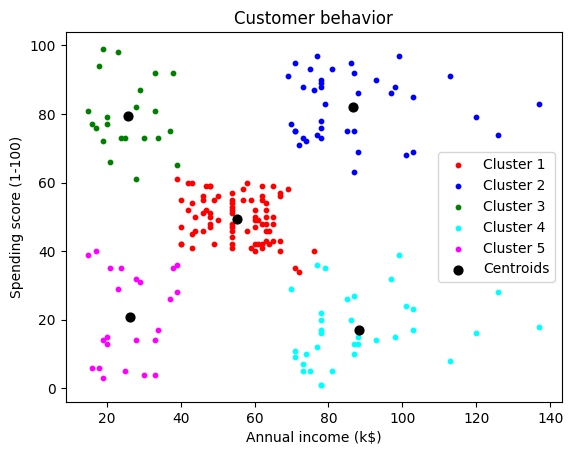

In [26]:
plt.scatter(X_to_Normal[y_kmeans==0,0], X_to_Normal[y_kmeans == 0,1], s = 10, c='red', label='Cluster 1') # 80 datapoints
plt.scatter(X_to_Normal[y_kmeans == 1,0], X_to_Normal[y_kmeans == 1,1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X_to_Normal[y_kmeans==2,0], X_to_Normal[y_kmeans==2,1], s=10, c= 'green', label = 'Cluster 3')
plt.scatter(X_to_Normal[y_kmeans == 3,0], X_to_Normal[y_kmeans == 3,1], s = 10, c = 'cyan', label = 'Cluster 4'  )
plt.scatter(X_to_Normal[y_kmeans == 4,0], X_to_Normal[y_kmeans == 4,1], s = 10, c = 'magenta', label = 'Cluster 5'  )
plt.scatter(To_normal_cluster_centers[:,0], To_normal_cluster_centers[:,1], s = 40, c = 'black', label = 'Centroids' )# le coordinate dei centroidi di ogni kluster
plt.legend()
plt.title('Customer behavior')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending score (1-100)')
plt.show()

In [27]:
kmeans.cluster_centers_ ## le coordinate scalate x,y dei centroidi di ogni kluster
# kmeans.cluster_centers_[:,0] = coordinata X 
# kmeans.cluster_centers_[:,1] = coordinata X 

array([[-0.16996449, -0.01258775],
       [ 0.68598525,  0.83995308],
       [-0.98007472,  0.76767677],
       [ 0.73150685, -0.85975724],
       [-0.96426444, -0.76044331]])

array([[39., 61.],
       [40., 55.],
       [40., 47.],
       [40., 42.],
       [40., 42.],
       [42., 52.],
       [42., 60.],
       [43., 54.],
       [43., 60.],
       [43., 45.],
       [43., 41.],
       [44., 50.],
       [44., 46.],
       [46., 51.],
       [46., 46.],
       [46., 56.],
       [46., 55.],
       [47., 52.],
       [47., 59.],
       [48., 51.],
       [48., 59.],
       [48., 50.],
       [48., 48.],
       [48., 59.],
       [48., 47.],
       [49., 55.],
       [49., 42.],
       [50., 49.],
       [50., 56.],
       [54., 47.],
       [54., 54.],
       [54., 53.],
       [54., 48.],
       [54., 52.],
       [54., 42.],
       [54., 51.],
       [54., 55.],
       [54., 41.],
       [54., 44.],
       [54., 57.],
       [54., 46.],
       [57., 58.],
       [57., 55.],
       [58., 60.],
       [58., 46.],
       [59., 55.],
       [59., 41.],
       [60., 49.],
       [60., 40.],
       [60., 42.],
       [60., 52.],
       [60., 47.],
       [60.,

Come vediamo nel grafico, vediamo che: 
1) il gruppo/kluster 1 spende nel nostro centro commerciale in modo rapportato al loro salario annuo
2)  il gruppo 2 ha il maggiore **annual income**, infatti queste persone spendono anchesse molto ogni anno
3)  La classe 3 guadagna bene all anno, ma non fa tante spese.
4)  La classe 4 ha un basso års incomst e spende poco centro commerciale
5)   Il gruppo 5 ha un salario annuo basso, ma comunque questa classe di compratori spende comunque molto annualmente nel nostro centro commerciale.

Se ora vogliamo predire un nuovo dato, cioe' inseriamo una nuova persona con un salario annuo e un score rating, il modello calcolera a quale sara il centroide piu' vicino, e il modello assegnera a questo datapoint la classe piu' vicina a questo datapoint.

Kmeans funziona ugualmente anche con piu' du 2 features, solo che e' piu' complicato plottare
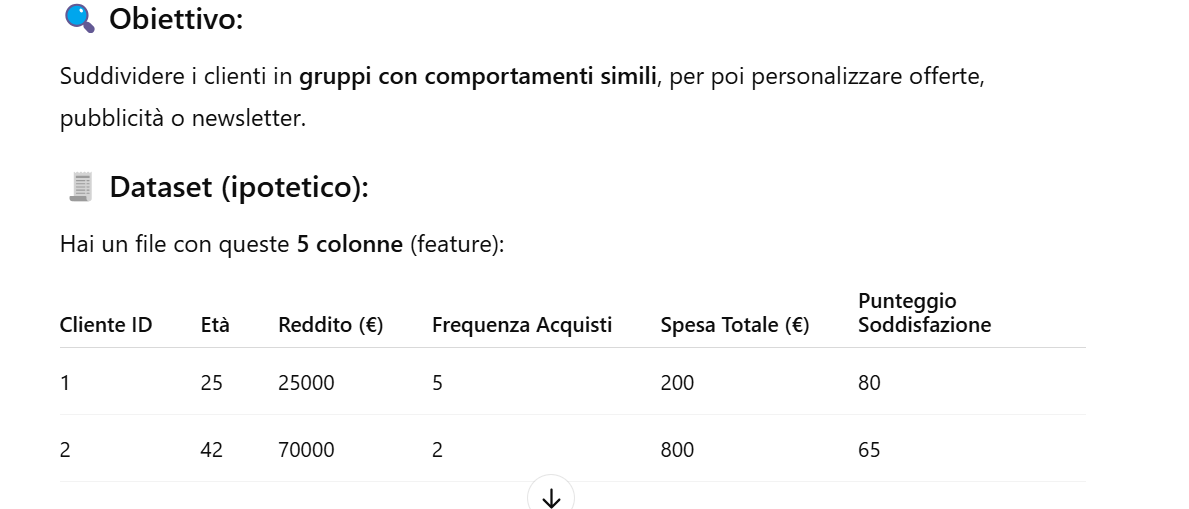

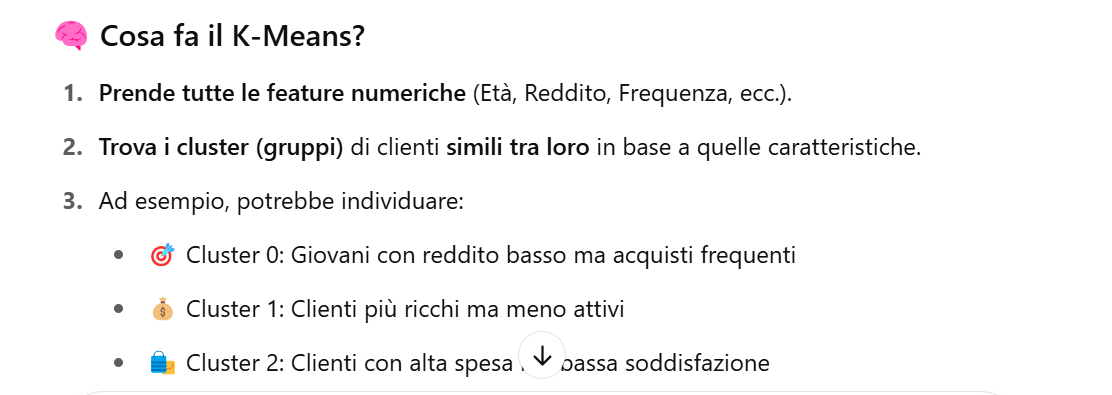
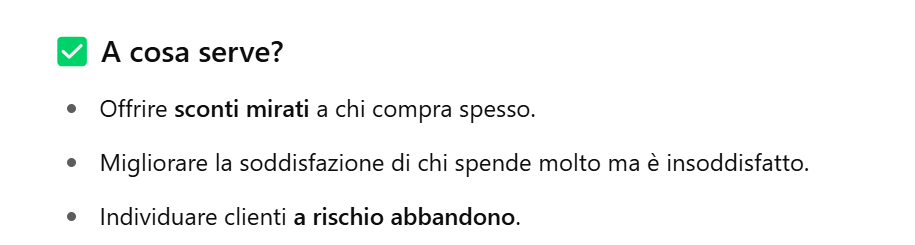

In [28]:
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [29]:
# X[:10]

## Predict new value

In [30]:
X[y_kmeans == 0][:10]
# X[y_kmeans == 1][:10]
# X[y_kmeans == 2][:10]

array([[-0.61643836,  0.2875817 ],
       [-0.5890411 ,  0.13071895],
       [-0.5890411 , -0.07843137],
       [-0.5890411 , -0.20915033],
       [-0.5890411 , -0.20915033],
       [-0.53424658,  0.05228758],
       [-0.53424658,  0.26143791],
       [-0.50684932,  0.10457516],
       [-0.50684932,  0.26143791],
       [-0.50684932, -0.13071895]])

In [ ]:
# Troviamo i dati originali che il modello ha inserito nel cluster == 0
inv_trans0 = scaler.inverse_transform(X[y_kmeans == 0][:10])
inv_trans0

array([[39., 61.],
       [40., 55.],
       [40., 47.],
       [40., 42.],
       [40., 42.],
       [42., 52.],
       [42., 60.],
       [43., 54.],
       [43., 60.],
       [43., 45.]])

In [ ]:
# creiamo dei nuovi valori simili a quelli che il modello ha assegnato come classe cluster == 0 e vediamo se anche a questi nuovi dat esso assegna
# classe 0. Se cosi, mostra che il modello e' affidabile.
new_value = [[38,60]] 
scaled_new_value = scaler.transform(new_value)
scaled_new_value
## expect class assign = 2. Anche sui dati nuovi, il modello assegna le classi giuste, quelle classi stabilite' durante il train del modello 

array([[-0.64383562,  0.26143791]])

In [33]:
new_val_y_pred = kmeans.predict(scaled_new_value)

In [ ]:
new_val_y_pred # Il modello ha assegnato la classe 0. questa e' una prova che il modello sembra affidabile

array([0], dtype=int32)

Se ci sono piu' di 3 features non si puo fare lo scatter, ma kmeans funziona ugualmente:
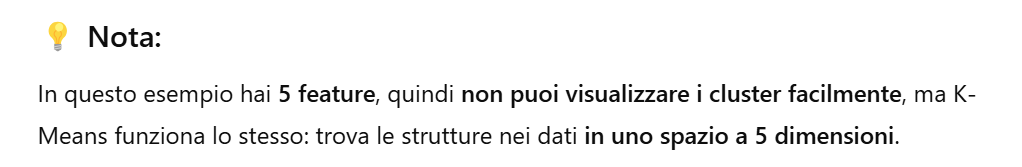

## come procedere dopo avere applicato il metodo kmean su un dataset?
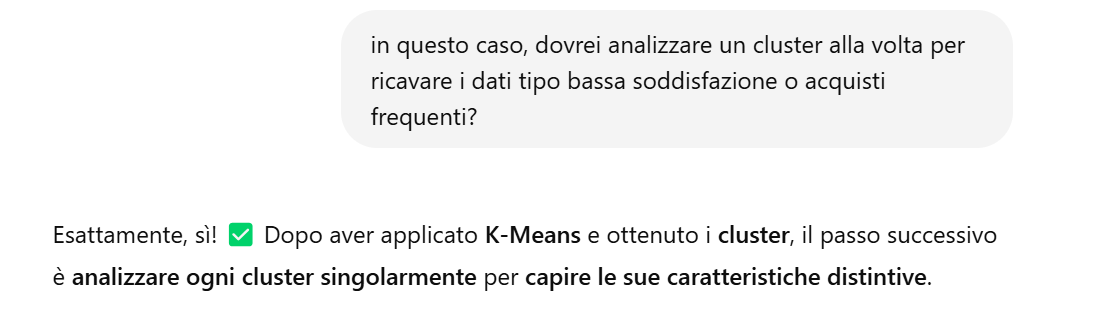
Quindi Aggiungiamo i dati kmeans nel dataset come una nuova feature

In [35]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df['Clusters'] = y_kmeans ## a ogni row del dataset viene assegnato il suo cluster

In [37]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [ ]:
X[y_kmeans == 3][:5] ## la nuova colonna ha dati corretti per ogni row

array([[ 0.23287671, -0.54901961],
       [ 0.26027397, -1.01960784],
       [ 0.26027397, -1.07189542],
       [ 0.31506849, -1.17647059],
       [ 0.31506849, -1.12418301]])

In [ ]:
# (E' consigliato fare questa pulizia all inizio)
df.drop(['Genre','CustomerID'],axis=1, inplace=True) ## elimiamo la colonna Genre perche' ha dati non numerici e quindi non funzionerebbe il 'groupby()'
# la colonna CustomerID invece la eliminiamo perche non ci serve 

In [40]:
# df.head()

### Ora possiamo analizzare i dati con un group by like Sql codice e fare il mean di questi dati:
I dati ci mostrano le medie dei dati di ogni cluster, e in base a questi dati sappiamo le **"medie"** dei nostri potenziali clienti la quale potremmo mandare ad esempio le publicita' di nuovi articoli **(le persone del cluster (1))**, e a chi mandare per esempio dei buoni sconto omaggio(per esempio alle persone appartenenti alla **classe/cluster (3)**,  che hanno un **alto Income**, ma non fanno tante compere, allo scopo di tenersi cari questi clienti cosicche' questi non facciano compere in altri centri commerciali).

**Quindi k-nn e ottimo per strategie di marketing**

In [41]:
df.groupby('Clusters').mean()
# I valori sono gli stessi ma i cluster sono diversi a confronto del dataset non scalato
# Questo e' normale, perche il modello assegna la classe in modo arbitrario
# queste etichette non hanno un significato intrinseco e possono variare tra diverse esecuzioni dell'algoritmo, anche se i dati sottostanti e la struttura dei cluster rimangono invariati.

,Age,Annual Income (k$),Spending Score (1-100)
Clusters,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


## Obbiettivo di K-nn:
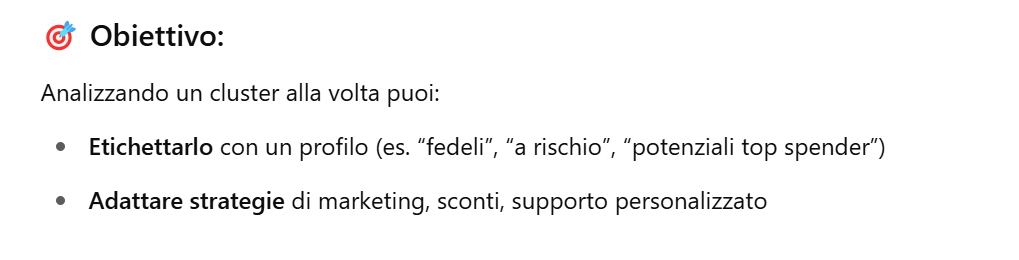